Kodumuzun doğru çalışması için gerekli olan kütüphanler ,metrikler import edilmiştir 

In [3]:

import pandas as pd
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,accuracy_score,precision_score,recall_score,f1_score 

İşlem görecek dataset kaggel den çekilmiştir ve bu çekilen datasetin okuma işlemiş yapılmaktadır

In [4]:
df=pd.read_csv("creditcard.csv")
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

datasetin infosuna bakılmıştır ve datasetdeki sütun adları yazılmıştır

In [5]:
print(df.info(),"\n")
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Dataset boyutuna ve sınıf dağılımına bakılmışştır .Dataset sınıf dağılımı normalize edilmiştir

In [6]:
print("Veri Seti Boyutu:", df.shape)

print("\nSınıf Dağılımı:")
print(df["Class"].value_counts())

print("\nSınıf Dağılımı (Oransal):")
print(df["Class"].value_counts(normalize=True))


Veri Seti Boyutu: (284807, 31)

Sınıf Dağılımı:
Class
0    284315
1       492
Name: count, dtype: int64

Sınıf Dağılımı (Oransal):
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


Dataset deki bulunan class tipleri olan amount ve time sütunların descriplerine bakılmıştır

In [7]:
print(df[["Amount","Time"]].describe())

              Amount           Time
count  284807.000000  284807.000000
mean       88.349619   94813.859575
std       250.120109   47488.145955
min         0.000000       0.000000
25%         5.600000   54201.500000
50%        22.000000   84692.000000
75%        77.165000  139320.500000
max     25691.160000  172792.000000


Null değer kontrolu yapılmıştır 

In [8]:
print(df[["Amount","Time"]].isnull().sum())
# print(df[["min","max"]].isnull().sum())

Amount    0
Time      0
dtype: int64


Genel olarak tüm sütunların descriplerine bakılmıştır

In [9]:
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

Amount ve time adlı sütun isimleri normalize edilmiştir

In [10]:
# df["Amount"]=StandardScaler.fit_transform(df["Amount"].values.reshape(-1,1))
# df["Time"]=StandardScaler().fit_transform(df["Time"].values.reshape(-1,1))

Model eğitmek için X ve y değerlerini atadık . X e stğnlarda bulunan class dışında diğer şeyler atanıyor , y değerine de class sütunu atanıyor

In [10]:
X=df.drop({"Class"},axis=1)
y=df["Class"]

Dataseti train ve test olarak ayırmaya yarar smote ile de dengesiz yani az olan veriyi çoğaltmaya yarar sentetik veriyle 

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
smote = SMOTE(random_state=42)
print(X_train.shape)
print(y_train.shape)



(227845, 30)
(227845,)


In [14]:
# df=df.drop(columns=["min","max"])

Dataset deki bulunan inf derğleri nan yapılmıştır sonra dataset deki bulunan tüm nan değereri 0 ile doldurmuştur

In [12]:

X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.fillna(0, inplace=True)

Train datasetdeki dengesizliği gidermek için smote yapılmıştır 

In [13]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


Smote öncesi ve sonrası olarak datasetdeki değerler gösterilimiştir

In [14]:
print("SMOTE Öncesi:")
print(y_train.value_counts())

print("\nSMOTE Sonrası:")
print(y_train_smote.value_counts())


SMOTE Öncesi:
Class
0    227451
1       394
Name: count, dtype: int64

SMOTE Sonrası:
Class
0    227451
1    227451
Name: count, dtype: int64


Random forest modeli oluşturulmuştur , eğitilmiştir ve pread i oluşturulmuştur.

In [15]:
# Train and predict with Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=80,n_jobs=-1)
rf.fit(X_train_smote, y_train_smote)
y_pred_rf = rf.predict(X_test)

Random Forest modelinin accuracy scoruna bakılmıştır

In [16]:
rf_acc=accuracy_score(y_test,y_pred_rf)
print("Random Forest Accuracy Score:",rf_acc)

Random Forest Accuracy Score: 0.999385555282469


Random Forest modelinin precisin, recall, fi scorlarına bakılmıştır

In [17]:
rf_precision=precision_score(y_test, y_pred_rf, pos_label=1)
rf_recall=recall_score(y_test, y_pred_rf, pos_label=1)
rf_f1=f1_score(y_test, y_pred_rf, pos_label=1)

print("Fraud Precision:",rf_precision) 
print("Fraud Recall:", rf_recall)
print("Fraud F1-score:", rf_f1)

Fraud Precision: 0.8181818181818182
Fraud Recall: 0.826530612244898
Fraud F1-score: 0.8223350253807107


Random Forest modelinin confusion matrixine bakılmıştır

In [18]:
rf_conf=confusion_matrix(y_test,y_pred_rf)
print("Random Forest Confusion Matrix:\n",rf_conf)

Random Forest Confusion Matrix:
 [[56846    18]
 [   17    81]]


Random Forest modelinin çoğu sınıflandırma metriklerini tek bir satırda göstermektedir modelin bu sayede hangi sınıfda daha iyi çalıştğı görünebilir

In [19]:
print(classification_report(y_test, y_pred_rf, target_names=["Normal", "Fraud"]))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56864
       Fraud       0.82      0.83      0.82        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [20]:
# XGBoost Modeli
xgb = XGBClassifier(
    n_estimators=600,      
    max_depth=6,           
    learning_rate=0.7,   
    subsample=0.9,         
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'   
)


xgb.fit(X_train_smote,y_train_smote)
y_pred_xgb = xgb.predict(X_test)

c:\Software_project\data_mine\data_mine_cassification\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [14:21:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [21]:
xgb_acc=accuracy_score(y_test,y_pred_xgb)
print("XGBoost Accuracy Score:",xgb_acc)

XGBoost Accuracy Score: 0.9994382219725431


In [22]:
xgb_precision=precision_score(y_test, y_pred_xgb, pos_label=1)
xgb_recall=recall_score(y_test, y_pred_xgb, pos_label=1)
xgb_f1=f1_score(y_test, y_pred_xgb, pos_label=1)
print("Fraud Precision:", xgb_precision)
print("Fraud Recall:", xgb_recall)
print("Fraud F1-score:", xgb_f1)

Fraud Precision: 0.83
Fraud Recall: 0.8469387755102041
Fraud F1-score: 0.8383838383838385


In [23]:
print(classification_report(y_test, y_pred_xgb, target_names=["Normal", "Fraud"]))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56864
       Fraud       0.83      0.85      0.84        98

    accuracy                           1.00     56962
   macro avg       0.91      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [24]:
xgb_conf=confusion_matrix(y_test,y_pred_xgb)
print("XGBoost Confusion Matrix:\n",xgb_conf)

XGBoost Confusion Matrix:
 [[56847    17]
 [   15    83]]


In [25]:

# MLP (Neural Network) modeli 
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32), 
    activation='relu',            
    solver='adam',    
    alpha=0.01,           
    learning_rate_init=0.001,      
    max_iter=200,  
    random_state=42
)

mlp.fit(X_train_smote,y_train_smote)
y_pred_mlp = mlp.predict(X_test)

In [26]:
mlp_acc=accuracy_score(y_test,y_pred_mlp)
print("MLP Accuracy Score:",mlp_acc)

MLP Accuracy Score: 0.9893086619149608


In [27]:
mlp_precision=precision_score(y_test, y_pred_mlp, pos_label=1)
mlp_recall=recall_score(y_test, y_pred_mlp, pos_label=1)
mlp_f1=f1_score(y_test, y_pred_mlp, pos_label=1)

print("Fraud Precision:",mlp_precision) 
print("Fraud Recall:", mlp_recall)
print("Fraud F1-score:", mlp_f1)

Fraud Precision: 0.12700729927007298
Fraud Recall: 0.8877551020408163
Fraud F1-score: 0.22222222222222218


In [28]:
print(classification_report(y_test, y_pred_mlp, target_names=["Normal", "Fraud"]))

              precision    recall  f1-score   support

      Normal       1.00      0.99      0.99     56864
       Fraud       0.13      0.89      0.22        98

    accuracy                           0.99     56962
   macro avg       0.56      0.94      0.61     56962
weighted avg       1.00      0.99      0.99     56962



In [29]:
mlp_conf=confusion_matrix(y_test,y_pred_mlp)
print("MLP Confusion Matrix:\n",mlp_conf)

MLP Confusion Matrix:
 [[56266   598]
 [   11    87]]


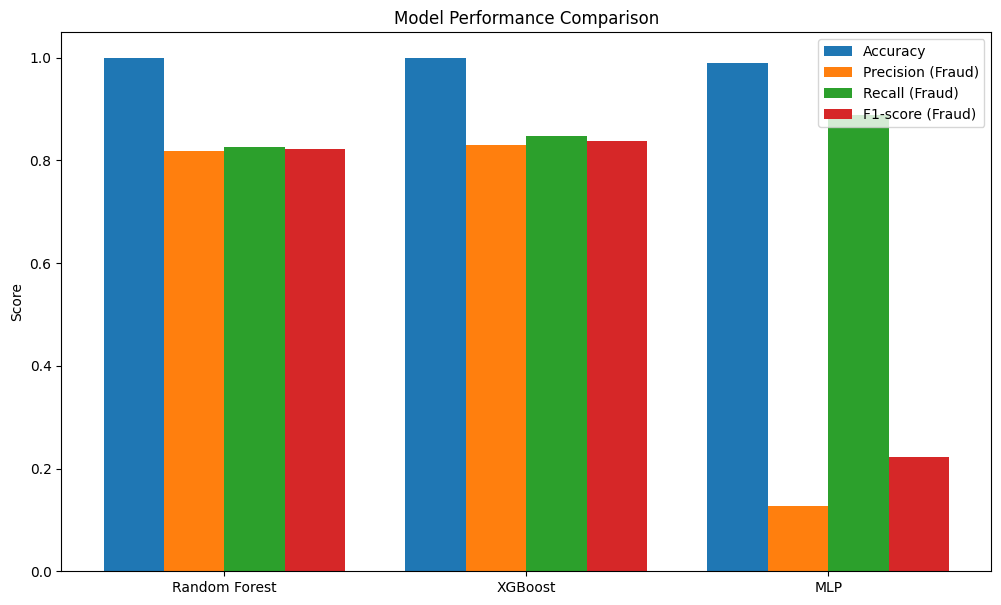

In [31]:
metrics=["Accuracy", "Precision (Fraud)", "Recall (Fraud)", "F1-score (Fraud)"]
models=["Random Forest","XGBoost","MLP"]

values=np.array([
    [rf_acc, xgb_acc, mlp_acc],
    [rf_precision, xgb_precision, mlp_precision],
    [rf_recall, xgb_recall, mlp_recall],
    [rf_f1, xgb_f1, mlp_f1]
])
x=np.arange(len(models))
width=0.2
plt.figure(figsize=(12,7))
for i in range(len(metrics)):
    plt.bar(x + (i-1.5)*width, values[i], width, label=metrics[i])
plt.xticks(x, models)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.show()